In [2]:
#Dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot, pylab
import scipy.stats as stats
import math

In [5]:
#Read in the datasets
austin_df = pd.read_csv("../../raw data/Austin_merged_data_with_time_deltas.csv")
louisville_df = pd.read_csv("../../raw data/Louisville_with_time_deltas_dogs_cats_only.csv")

austin_df['City']='Austin'
louisville_df['City']='Louisville'

# Average Time-To-Outcome by Animal Type

In [6]:
austin_data=austin_df.loc[:,['Days from Intake to Outcome','Animal Type_intake']]
louisville_data=louisville_df.loc[:,['Days between Intake and Outcome','AnimalType']]

austin_data=austin_data.rename(columns={"Animal Type_intake":"Animal Type"})
louisville_data=louisville_data.rename(columns={"AnimalType":"Animal Type","Days between Intake and Outcome":"Days from Intake to Outcome"})
austin_data['City']='Austin'
louisville_data['City']='Louisville'
df=pd.concat([austin_data,louisville_data]).reset_index()

#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='DOG',value='Dog')
df=df.replace(to_replace='CAT',value='Cat')

#include only data for Dogs and Cats
group_by_animal_type=df.groupby(df['Animal Type'])

#count up total dogs and cats
df['Animal Type'].value_counts()

#create lists for boxplot showing intake times for cats vs dogs

cats=[]
dogs=[]

for row in range(len(df)):
    if (df.loc[row,'Animal Type']=="Cat") & (df.loc[row,'Days from Intake to Outcome']>0):
        cats.append(df.loc[row,'Days from Intake to Outcome'])
    elif (df.loc[row,'Animal Type']=="Dog") & (df.loc[row,'Days from Intake to Outcome']>0):
        dogs.append(df.loc[row,'Days from Intake to Outcome'])
    else:
        continue

Dog    108384
Cat     94108
Name: Animal Type, dtype: int64

In [11]:
%%capture

#set up the figure
data=[cats,dogs]
labels=['Cats','Dogs']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Animal Type (Cats vs Dogs)')
pylab.xlabel("Animal Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Cats: 15.462
Dogs: 14.044

Standard Deviations:
Cats: 34.421
Dogs: 37.595

Medians:
Cats: 5.857
Dogs: 5.983


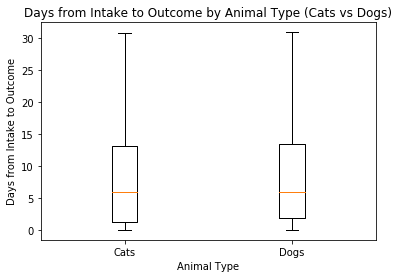

In [12]:
#save box and whiskers plot to PNG file
#pyplot.savefig('../figures/time_to_outcome_by_animal_type.png')

print(f"Mean values:\nCats: {round(np.mean(cats),3)}\nDogs: {round(np.mean(dogs),3)}\n")
print(f"Standard Deviations:\nCats: {round(np.std(cats),3)}\nDogs: {round(np.std(dogs),3)}\n")
print(f"Medians:\nCats: {round(np.median(cats),3)}\nDogs: {round(np.median(dogs),3)}")

#show box and whiskers plot
pyplot.show()

# Average Time-To-Outcome by City

In [8]:
#create lists for boxplot showing intake times for cats vs dogs

austin=[]
louisville=[]

#fill the Louisville list
for row in range(len(louisville_df)):
    if louisville_df.loc[row,'Days between Intake and Outcome']>0:
        louisville.append(louisville_df.loc[row,'Days between Intake and Outcome'])
    else:
        continue

#fill the Austin list
for row in range(len(austin_df)):
    if austin_data.loc[row,'Days from Intake to Outcome']>0:
        austin.append(austin_df.loc[row,'Days from Intake to Outcome'])
    else:
        continue

In [13]:
%%capture

#set up the figure
data=[austin,louisville]
labels=['Austin','Louisville']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by City (Austin vs Louisville)')
pylab.xlabel("City")
pylab.ylabel("Days from Intake to Outcome")

Means:
Austin: 17.78
Louisville: 13.524

Standard Deviations:
Austin: 38.187
Louisville: 35.283

Medians:
Austin: 5.395
Louisville: 6.019


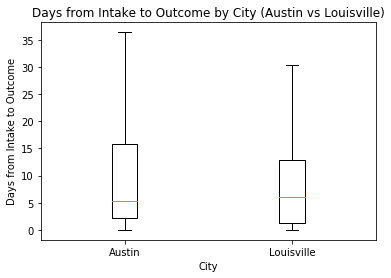

In [14]:
#save box and whiskers plot to PNG file
#pyplot.savefig('../figures/time_to_outcome_by_city.png')

print(f"Means:\nAustin: {round(np.mean(austin),3)}\nLouisville: {round(np.mean(louisville),3)}\n")
print(f"Standard Deviations:\nAustin: {round(np.std(austin),3)}\nLouisville: {round(np.std(louisville),3)}\n")
print(f"Medians:\nAustin: {round(np.median(austin),3)}\nLouisville: {round(np.median(louisville),3)}")

#show box and whiskers plot
pyplot.show()

In [17]:
#Is this difference significant? (Probably not, but let's check because we can)

#check for equality of variances (Levene's test)
#and then run t-test based on result

levene=stats.levene(austin,louisville)

print(f"Levene test result: p = {round(levene.pvalue,5)}")
if levene.pvalue < .05:
    print("Assume unequal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=False)
else:
    print("Assume equal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=True)    

print("T-test results:")
print(f"t = {round(result.statistic,4)}\nP = {round(result.pvalue,4)}")
if result.pvalue < .05:
    print(f"\nThe difference is significant.")
else:
    print(f"\nThe difference is not significant.")

#STATS SUMMARY

print("Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).")
print("\nHowever, Austin's mean time is higher (17.8 vs 13.5).\n\nThis difference was statistically significant (t=22.6, p<.01).")

Levene test result: p = 0.0
Assume unequal variances


T-test results:
t = 22.615
P = 0.0

The difference is significant.
Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).

However, Austin's mean time is higher (17.8 vs 13.5).

This difference was statistically significant (t=22.6, p<.01).


# Average Time-To-Outcome by Outcome Type

In [21]:
#Restrict our analysis to adoption, transfer, euthanasia, and death
#Adoption

austin_data=austin_df[austin_df['Outcome Type'].isin(['Adoption','Transfer','Euthanasia','Died'])]
louisville_data=louisville_df[louisville_df['OutcomeType'].isin(['ADOPTION','EUTH','TRANSFER','DIED'])]

austin_data=austin_data.rename(columns={"Outcome Type":"OutcomeType","Days from Intake to Outcome":"Days between Intake and Outcome"})

df=pd.concat([austin_data,louisville_data]).reset_index()

#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='ADOPTION',value='Adoption')
df=df.replace(to_replace='EUTH',value='Euthanasia')
df=df.replace(to_replace='TRANSFER',value='Transfer')
df=df.replace(to_replace='DIED',value='Died')

df['OutcomeType'].value_counts()

#create lists for boxplot showing intake times for cats vs dogs

adoption=[]
euthanasia=[]
transfer=[]
died=[]

#fill the lists
for row in range(len(df)):    
    if (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Adoption'):
        adoption.append(df.loc[row,'Days between Intake and Outcome'])
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Euthanasia'):
        euthanasia.append(df.loc[row,'Days between Intake and Outcome'])        
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Transfer'):
        transfer.append(df.loc[row,'Days between Intake and Outcome'])                
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Died'):
        died.append(df.loc[row,'Days between Intake and Outcome'])                        
    else:
        continue

Euthanasia    70932
Adoption      49020
Transfer      37777
Died           2953
Name: OutcomeType, dtype: int64

In [22]:
%%capture

#set up the figure
data=[adoption, euthanasia, transfer, died]
labels=['Adopted','Euthanized','Transferred','Died']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Outcome Type')
pylab.xlabel("Outcome Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Adopted: 31.134
Euthanized: 8.403
Transferred: 11.792
Died: 17.88

Standard Deviations:
Adopted: 55.158
Euthanized: 17.42
Transferred: 24.686
Died: 64.101

Medians:
Adopted: 14.18
Euthanized: 5.815
Transferred: 5.106
Died: 6.956


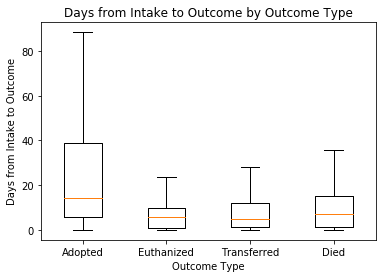

In [23]:
#save box and whiskers plot to PNG file
#pyplot.savefig('../figures/time_to_outcome_by_outcome_type.png')

print(f"Mean values:\nAdopted: {round(np.mean(adoption),3)}\nEuthanized: {round(np.mean(euthanasia),3)}\nTransferred: {round(np.mean(transfer),3)}\nDied: {round(np.mean(died),3)}")
print(f"\nStandard Deviations:\nAdopted: {round(np.std(adoption),3)}\nEuthanized: {round(np.std(euthanasia),3)}\nTransferred: {round(np.std(transfer),3)}\nDied: {round(np.std(died),3)}")
print(f"\nMedians:\nAdopted: {round(np.median(adoption),3)}\nEuthanized: {round(np.median(euthanasia),3)}\nTransferred: {round(np.median(transfer),3)}\nDied: {round(np.median(died),3)}")

#show box and whiskers plot
pyplot.show()


In [24]:
#ANOVA:
stats.f_oneway(adoption, euthanasia, transfer, died)

F_onewayResult(statistic=4086.9711082211779, pvalue=0.0)

# Average Time-To-Outcome by Age at Intake

In [26]:
#Plot age at intake against Days from Intake to Outcome

x=austin_df['AgeDays_intake']
y=austin_df['Days from Intake to Outcome']

len(x)
len(y)

print(f"Average age: {round(np.mean(x),2)} days")
print(f"Average time to outcome: {round(np.mean(y),2)} days")

57593

57593

Average age: 742.24 days
Average time to outcome: 16.86 days


In [31]:
#remove outliers

x_max=np.mean(x)+(3*np.std(x))
x_min=np.mean(x)-(3*np.std(x))
y_max=np.mean(y)+(3*np.std(y))
y_min=np.mean(y)-(3*np.std(y))

austin_data_outliers_removed=austin_df[(austin_df['AgeDays_intake'] < x_max) 
                                         & (austin_df['AgeDays_intake'] > x_min)
                                         & (austin_df['Days from Intake to Outcome'] < y_max)                                        
                                         & (austin_df['Days from Intake to Outcome'] > y_min)]

# All Animals

In [32]:
#Redefine data for analysis using subset of data without outliers
x=austin_data_outliers_removed['AgeDays_intake']
y=austin_data_outliers_removed['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nALL ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, although the effect size is very small")



ALL ANIMALS:
Coefficient: -0.0014329168427347173
R-squared: -0.057230701424258755
P-value: 0.0

The correlation is significant, although the effect size is very small


In [33]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (All Animals)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

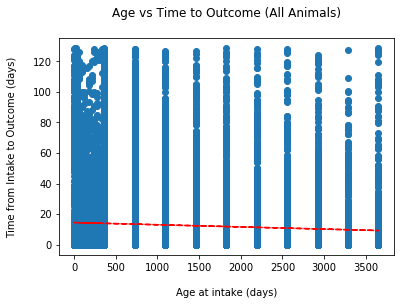

In [34]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('../figures/age_vs_time_to_outcome_ALL.png')

pyplot.show()

# Adopted vs Euthanized Animals

In [35]:
#Plot separately for outcome types

austin_data_outliers_removed['Outcome Type'].value_counts()

adoption=austin_data_outliers_removed[austin_data_outliers_removed['Outcome Type']=='Adoption']
euthanasia=austin_data_outliers_removed[austin_data_outliers_removed['Outcome Type']=='Euthanasia']

Adoption           23264
Transfer           20077
Return to Owner     8741
Euthanasia          2355
Died                 486
Rto-Adopt             76
Missing               34
Disposal              21
Name: Outcome Type, dtype: int64

In [36]:
#Age vs. Time to Outcome for Adopted animals

#Redefine data for analysis using subset of data without outliers
x=adoption['AgeDays_intake']
y=adoption['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nADOPTED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is very small")



ADOPTED ANIMALS:
Coefficient: -0.0007430668781439313
R-squared: -0.020098228288934525
P-value: 0.002

The correlation is significant, but the effect size is very small


In [37]:
%%capture 
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (Adopted Animals Only)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

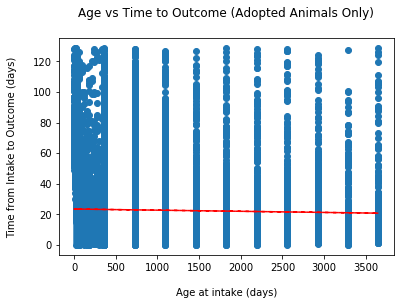

In [38]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('../figures/age_vs_time_to_outcome_Adoption.png')

pyplot.show()

In [39]:
#Age vs. Time to Outcome for Euthanized animals

#Redefine data for analysis using subset of data without outliers
x=euthanasia['AgeDays_intake']
y=euthanasia['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nEUTHANIZED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is not significant")



EUTHANIZED ANIMALS:
Coefficient: -0.00011838458126282147
R-squared: -0.00902929422301661
P-value: 0.661

The correlation is not significant


In [40]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (Euthanized Animals Only)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

In [41]:
print("\n\nEUTHANIZED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, although the effect size is very small")



EUTHANIZED ANIMALS:
Coefficient: -0.00011838458126282147
R-squared: -0.00902929422301661
P-value: 0.661

The correlation is significant, although the effect size is very small


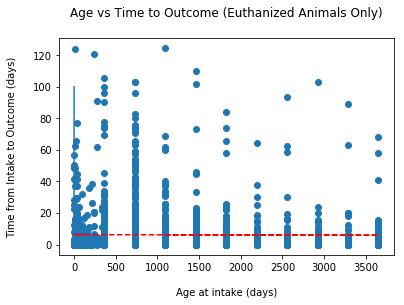

In [42]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('../figures/age_vs_time_to_outcome_Euthanasia.png')

pyplot.show()

# Cats vs Dogs (Adopted animals only)

In [43]:
#Plot separately for Cats and Dogs (separate colors)

adoption['Animal Type_intake'].value_counts()

dogs=adoption[adoption['Animal Type_intake']=='Dog']
cats=adoption[adoption['Animal Type_intake']=='Cat']


Dog    13255
Cat    10009
Name: Animal Type_intake, dtype: int64

In [44]:
#CATS

#Redefine data for analysis using subset of data without outliers
x=cats['AgeDays_intake']
y=cats['Days from Intake to Outcome']
#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nCATS:\n----------------")
print(f"Average age (days): {round(np.mean(x),2)}")
print(f"Median age (days): {round(np.median(x),2)}")
print(f"Average time to outcome (days): {round(np.mean(y),2)}")
print(f"Median time to outcome (days): {round(np.median(y),2)}")
print("\nRegression model:")
print(f"Coefficient: {round(coefficient,3)}")
print(f"R-squared: {round(r_squared,3)}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is small")
print("\nFor CATS, younger animals are generally adopted less quickly than older animals")



CATS:
----------------
Average age (days): 283.81
Median age (days): 30.0
Average time to outcome (days): 31.76
Median time to outcome (days): 24.43

Regression model:
Coefficient: -0.002
R-squared: -0.039
P-value: 0.0

The correlation is significant, but the effect size is small

For CATS, younger animals are generally adopted less quickly than older animals


In [45]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("Age at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)")
pylab.title("Age vs Time to Outcome (Cats Only)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

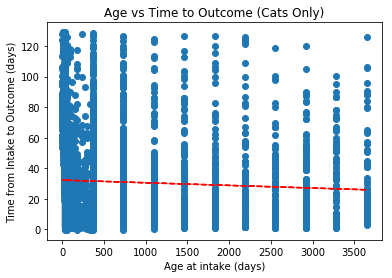

In [46]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('../figures/age_vs_time_to_outcome_Cats.png')

pyplot.show()

In [47]:
#CATS

#Redefine data for analysis using subset of data without outliers
x=dogs['AgeDays_intake']
y=dogs['Days from Intake to Outcome']
#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nDOGS:\n----------------")
print(f"Average age (days): {round(np.mean(x),2)}")
print(f"Median age (days): {round(np.median(x),2)}")
print(f"Average time to outcome (days): {round(np.mean(y),2)}")
print(f"Median time to outcome (days): {round(np.median(y),2)}")
print("\nRegression model:")
print(f"Coefficient: {round(coefficient,3)}")
print(f"R-squared: {round(r_squared,3)}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is small")
print("\nFor DOGS, younger animals are generally adopted more quickly than older animals")



DOGS:
----------------
Average age (days): 601.17
Median age (days): 365.0
Average time to outcome (days): 16.35
Median time to outcome (days): 6.23

Regression model:
Coefficient: 0.004
R-squared: 0.124
P-value: 0.0

The correlation is significant, but the effect size is small

For DOGS, younger animals are generally adopted more quickly than older animals


In [48]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("Age at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)")
pylab.title("Age vs Time to Outcome (Dogs Only)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

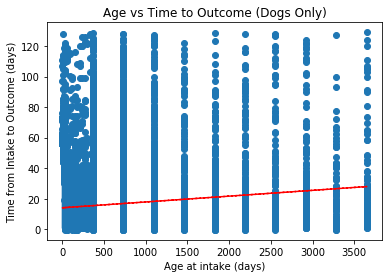

In [49]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('../figures/age_vs_time_to_outcome_Dogs.png')

pyplot.show()